In [1]:
%config InlineBackend.figure_format = "retina"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

Welcome to JupyROOT 6.18/04
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/mat

In [3]:
from keras.models import load_model
# load model
model = load_model('model.h5')

Using TensorFlow backend.
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [4]:
branches = ['br_njets', 'br_nbjets', 'br_scalar_ht',
       'br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4', 'br_met',
       'br_met_phi', 'br_sphericity', 'br_aplanarity', 'br_fox_wolfram_1',
       'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4', 'br_w_pt', 'br_w_eta', 'br_w_phi', 
       'br_operator_4', 'br_operator_9', 'br_operator_10', 'br_operator_12','br_operator_14' ]

input_branches = ['br_njets', 'br_nbjets', 'br_scalar_ht',
       'br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4', 'br_met',
       'br_met_phi', 'br_sphericity', 'br_aplanarity', 'br_fox_wolfram_1',
       'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4', 'br_w_pt', 'br_w_eta', 'br_w_phi']

df_sig_nodtG = uproot.open("/mnt/harddisk4/scratch/ttbar_no_dtG_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG1  = uproot.open("/mnt/harddisk4/scratch/signal_dtG1_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG2  = uproot.open("/mnt/harddisk4/scratch/signal_dtG2_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG3  = uproot.open("/mnt/harddisk4/scratch/signal_dtG3_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG4  = uproot.open("/mnt/harddisk4/scratch/signal_dtG4_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG5  = uproot.open("/mnt/harddisk4/scratch/signal_dtG5_flat.root")["outtree"].pandas.df(branches)
df_sig_dtG10 = uproot.open("/mnt/harddisk4/scratch/signal_dtG10_flat.root")["outtree"].pandas.df(branches)

df_dyjets      = uproot.open("/mnt/harddisk4/scratch/dyjets_flat_30M.root")["outtree"].pandas.df(branches)
df_wjets       = uproot.open("/mnt/harddisk4/scratch/wjets_flat_60M.root")["outtree"].pandas.df(branches)
df_single_top  = uproot.open("/mnt/harddisk4/scratch/single_top_merged_flat.root")["outtree"].pandas.df(branches)

#df_sig_nodtG   = pd.read_hdf("test_data.h5","df_sig_test")
#df_dyjets      = pd.read_hdf("test_data.h5","df_dyjets_test")
#df_wjets       = pd.read_hdf("test_data.h5","df_wjets_test")
#df_single_top  = pd.read_hdf("test_data.h5","df_single_top_test")

In [5]:
xsec = {"signal":0.3*832, "dyjets":6500, "wjets":123000, "single_top":0.2*286.7}

ngen_signal     = len(uproot.open("/mnt/harddisk4/scratch/signal_dtG1_delphes.root")["Delphes"])
ngen_dyjets     = len(uproot.open("/mnt/harddisk4/scratch/dyjets_delphes_30M.root")["Delphes"])
ngen_wjets      = len(uproot.open("/mnt/harddisk4/scratch/wjets_delphes_60M.root")["Delphes"])
ngen_single_top = len(uproot.open("/mnt/harddisk4/scratch/single_top_merged_delphes.root")["Delphes"])

ngen = {"signal":ngen_signal, "dyjets":ngen_dyjets, "wjets":ngen_wjets, "single_top":ngen_single_top}
print(ngen)

{'signal': 1000000, 'dyjets': 30281892, 'wjets': 56058406, 'single_top': 10000000}


In [13]:
def calc_asymmetry(df_sig, operator, threshold, nodtG=0):
    lumi = 1
    operator_name = 'br_operator_'+str(operator)
    
    from sklearn.externals import joblib
    scaler = joblib.load("scaler.save")
    
    batch_size = 2**20
    sig_pred         = model.predict_proba(scaler.transform(df_sig[input_branches]), batch_size= batch_size)
    dyjets_preds     = model.predict_proba(scaler.transform(df_dyjets[input_branches]), batch_size= batch_size)
    wjets_preds      = model.predict_proba(scaler.transform(df_wjets[input_branches]), batch_size= batch_size)
    single_top_preds = model.predict_proba(scaler.transform(df_single_top[input_branches]), batch_size= batch_size)
    
    if not nodtG:
        mask         = (df_sig[operator_name] > 0.) & ((sig_pred >= threshold).flatten())
        nsig_pos     = (xsec["signal"] * lumi / ngen["signal"]) * len(df_sig[mask]) 
        mask         = (df_sig[operator_name] < 0.) & ((sig_pred >= threshold).flatten())
        nsig_neg     = (xsec["signal"] * lumi / ngen["signal"]) * len(df_sig[mask])

    else:
        mask         = (df_sig[operator_name] > 0.) & ((sig_pred >= threshold).flatten())
        nsig_pos     = (xsec["signal"] * lumi / (ngen["signal"]) * len(df_sig[mask])) 
        mask         = (df_sig[operator_name] < 0.) & ((sig_pred >= threshold).flatten())
        nsig_neg     = (xsec["signal"] * lumi / (ngen["signal"])) * len(df_sig[mask])
    
    mask             = (df_dyjets[operator_name] > 0.) & ((dyjets_preds >= threshold).flatten())
    n_dyjets_pos     = (xsec["dyjets"] * lumi / ngen["dyjets"])     * len(df_dyjets[mask])
    
    mask             = (df_dyjets[operator_name] < 0.) & ((dyjets_preds >= threshold).flatten())
    n_dyjets_neg     = (xsec["dyjets"] * lumi / ngen["dyjets"]) * len(df_dyjets[mask])  

    mask             = (df_wjets[operator_name] > 0.) & ((wjets_preds >= threshold).flatten())
    n_wjets_pos      = (xsec["wjets"] * lumi / ngen["wjets"]) * len(df_wjets[mask])
    
    mask             = (df_wjets[operator_name] < 0.) & ((wjets_preds >= threshold).flatten())
    n_wjets_neg      = (xsec["wjets"] * lumi / ngen["wjets"]) * len(df_wjets[mask])
    
    mask             = (df_single_top[operator_name] > 0.) & ((single_top_preds >= threshold).flatten())
    n_single_top_pos = (xsec["single_top"] * lumi / ngen["single_top"]) * len(df_single_top[mask])

    mask             = (df_single_top[operator_name] < 0.) & ((single_top_preds >= threshold).flatten())
    n_single_top_neg = (xsec["single_top"] * lumi / ngen["single_top"]) * len(df_single_top[mask])

    nbkg_pos =  n_dyjets_pos + n_wjets_pos + n_single_top_pos
    nbkg_neg =  n_dyjets_neg + n_wjets_neg + n_single_top_neg
    
    npos = 1 * nsig_pos + 1 * nbkg_pos
    nneg = 1 * nsig_neg + 1 * nbkg_neg
    
    print("operator=%i nsig_pos=%.4f nsig_neg=%.4f nsig_asym=%.5f nbkg_pos=%.4f, nbkg_neg=%.4f nbkg_asym=%.5f" % 
         (operator, nsig_pos, nsig_neg, ((nsig_pos-nsig_neg)/(nsig_pos+nsig_neg)), nbkg_pos, nbkg_neg, ((nbkg_pos-nbkg_neg)/(nbkg_pos+nbkg_neg))))
    
    numerator      = npos - nneg
    denominator    = npos + nneg
    
    if not nodtG:
        asymmetry      = numerator / denominator
        asymmetry_err  = asymmetry * (1 - denominator**0.5/denominator) + (abs(numerator)**0.5)/denominator
    else:
        asymmetry      = 0
        asymmetry_err  = numerator / denominator
        
    return [asymmetry, asymmetry_err]

In [14]:
def plot(i, color, threshold, loc, weights=1):
    from scipy.optimize import curve_fit
    
    def fit_func(x, a, b):
        # Curve fitting function
        return a * x + b

    plt.style.use(['science'])
    
    y = np.array([calc_asymmetry(df_sig_nodtG, i , threshold, nodtG=1),  
                  calc_asymmetry(df_sig_dtG1,  i , threshold),
                  calc_asymmetry(df_sig_dtG2,  i , threshold),
                  calc_asymmetry(df_sig_dtG3,  i , threshold),
                  calc_asymmetry(df_sig_dtG4,  i , threshold),
                  calc_asymmetry(df_sig_dtG5,  i , threshold)])

    
    asymmetry     = y[:,0]  
    asymmetry_err = y[:,1]
    
    x = [0, 1, 2, 3, 4, 5]
    
    bkg_only_asym     = np.array(len(x)*[0])
    bkg_only_asym_err = np.array(len(x)*[y[0,1]])
    
    if weights: 
        params, cov = curve_fit(fit_func, xdata=x[1:], ydata=asymmetry[1:], sigma = asymmetry_err[1:])
    else:
        params, cov = curve_fit(fit_func, xdata=x[1:], ydata=asymmetry[1:])
    
    param_errs = np.sqrt(np.diag(cov))
    
    plt.errorbar(x, asymmetry, yerr = asymmetry_err, color = color, marker = "o", linestyle="", capsize=3, label="expected asymmetry")
    #plt.plot(x, y(x), color = color, linestyle="--", label='slope = {:.5f} \nsignificance = {:.2f}'.format(params[0], abs(params[0])/abs(param_errs[0])))
    xt = np.linspace(min(x),max(x),50)
    #plt.plot(xt, np.poly1d(params)(xt), color = color, linestyle="--", label="expected asymmetry(fit)")
    #plt.fill_between(xt, np.poly1d(params - 1*param_errs)(xt), np.poly1d(params + 1*param_errs)(xt), color=color, alpha=0.2, label="$\pm 1 \sigma$ fit uncertaintiy")
    #plt.fill_between(xt, np.poly1d(params - 2*param_errs)(xt), np.poly1d(params + 2*param_errs)(xt), color=color, alpha=0.1, label="$\pm 2 \sigma$ fit uncertaintiy")
    plt.fill_between(x, bkg_only_asym-bkg_only_asym_err, bkg_only_asym+bkg_only_asym_err, color = "k", alpha = 0.1, hatch="/", label="expected background \n asymmetry ($\pm 1 \sigma$)")
    plt.plot(x, bkg_only_asym, linestyle="--", color="k", alpha=0.8)

    plt.ylim(-0.015, 0.025)
    plt.xlabel(r"$d_{tG}$", size=12)
    plt.ylabel(r"A$_{"+str(i)+"}$", size=12)
    plt.legend(loc=loc, fontsize=8)

0
operator=4 nsig_pos=16.8490 nsig_neg=16.9324 nsig_asym=-0.00247 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
operator=4 nsig_pos=25.6464 nsig_neg=25.5780 nsig_asym=0.00134 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
operator=4 nsig_pos=25.7081 nsig_neg=25.7258 nsig_asym=-0.00034 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
operator=4 nsig_pos=25.6841 nsig_neg=25.7739 nsig_asym=-0.00175 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
operator=4 nsig_pos=25.5660 nsig_neg=25.7789 nsig_asym=-0.00415 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
operator=4 nsig_pos=25.7422 nsig_neg=25.7739 nsig_asym=-0.00062 nbkg_pos=3.1517, nbkg_neg=3.2059 nbkg_asym=-0.00853
1
operator=9 nsig_pos=16.8315 nsig_neg=16.9498 nsig_asym=-0.00350 nbkg_pos=3.1422, nbkg_neg=3.2155 nbkg_asym=-0.01153
operator=9 nsig_pos=25.6060 nsig_neg=25.6184 nsig_asym=-0.00024 nbkg_pos=3.1422, nbkg_neg=3.2155 nbkg_asym=-0.01153
operator=9 nsig_pos=25.7028 nsig_neg=25.7310 nsig_asym=-0.00055 nbkg_

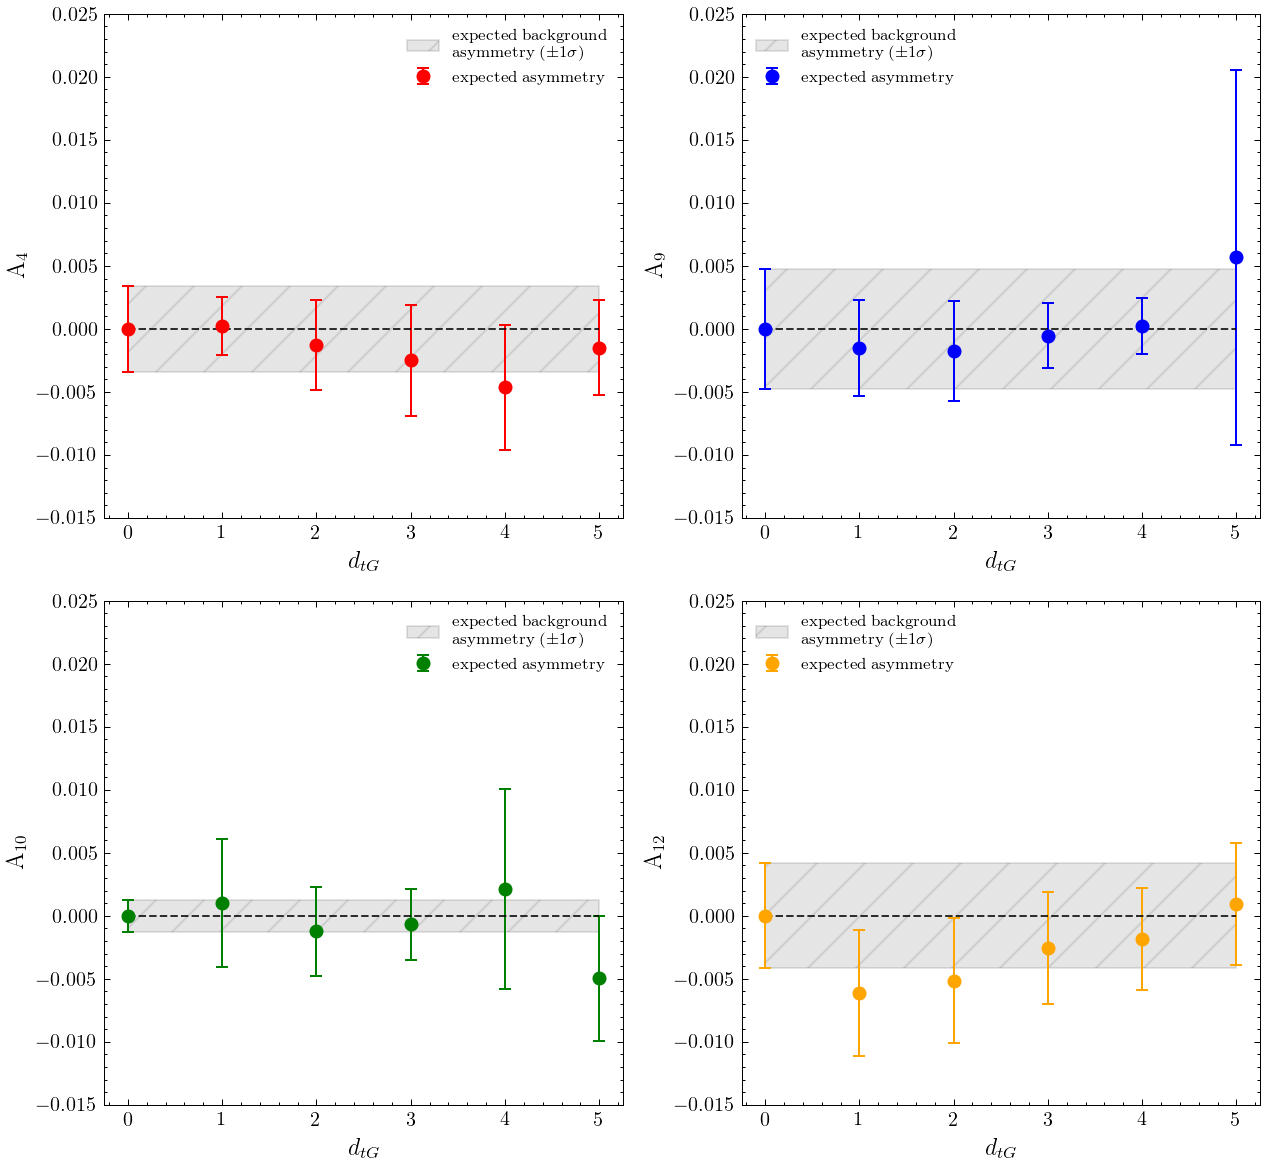

In [16]:
plt.rcParams["figure.figsize"] = (9,12)
threshold = 0.

operators   = [4, 9, 10, 12]
colors     = ["r", "b", "g", "orange", "purple"]
legend_loc = ['upper right', 'upper left', 'upper right', 'upper left', 'upper right']

for i, operator  in enumerate(operators):
    print(i)
    plt.subplot(3, 2, i+1)
    plot(operator, colors[i], threshold, legend_loc[i], weights=1)
plt.tight_layout()
plt.savefig("asymmetry_ML_0_"+str(int(100*threshold))+".pdf")